# Unit 5 - Financial Planning

In [64]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [65]:
import sys
!{sys.executable} -m pip install python-dotenv

In [66]:
# Specify the path to your .env file
dotenv_path = '/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/api.env'

# Load .env enviroment variables
load_dotenv(dotenv_path)

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [67]:
# Set current amount of shares data for crypto assets
shares_data = {
    "shares": [200, 320]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
BTC,200
ETH,320


In [68]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [69]:
# Fetch current BTC price
response_BTC = requests.get(btc_url)

# Get content 
response_content_BTC = response_BTC.content

# Convert to json to see structure of response_BTC.content
import json

# Formatting as json
data = response_BTC.json()

# Extract Bitcoin price 
bitcoin_price = data["data"]["1"]["quotes"]["USD"]["price"]

# Compute current value of your crypto 
btc_asset = df_shares.loc["BTC"]["shares"]
my_btc_value = btc_asset * bitcoin_price 

# Print current crypto wallet balance
print(f"The current value of your {btc_asset} BTC is ${my_btc_value:0.2f}")

The current value of your 200 BTC is $7939200.00


In [70]:
# Fetch current ETH price
response_ETH = requests.get(eth_url)

# Get content 
response_content_ETH = response_ETH.content

# Convert to json to see structure of response_ETH.content
import json

# Formatting as json
data = response_ETH.json()

# Extract Bitcoin price 
bitcoin_price = data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of your crypto 
eth_asset = df_shares.loc["ETH"]["shares"]
my_eth_value = eth_asset * bitcoin_price 

# Print current crypto wallet balance
print(f"The current value of your {eth_asset} ETH is ${my_eth_value:0.2f}")

The current value of your 320 ETH is $710422.40


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [71]:
# Set current amount of shares data for SPY (stocks) and AGG (bonds)
shares_data = {
    "shares": [50, 150]
}

# Set the tickers
tickers = ["SPY", "AGG"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
SPY,50
AGG,150


In [72]:
# Load environment variables
load_dotenv(dotenv_path)

# Access Alpaca API key ID
alpaca_api_key_id = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key_id,
    alpaca_secret_key,
    api_version="v2")


In [73]:
# Format current date as ISO format
today = pd.Timestamp("2023-01-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                            close    high    low trade_count    open   volume   
timestamp                                                                       
2023-01-20 05:00:00+00:00  100.09  100.26  99.89       18907  100.17  6095769   

                                          SPY                              \
                                 vwap   close    high     low trade_count   
timestamp                                                                   
2023-01-20 05:00:00+00:00  100.069086  395.88  396.04  388.38      504225   

                                                        
                            open    volume        vwap  
timestamp                                               
2023-01-20 05:00:00+00:00  390.1  91540638  392.589237

In [74]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio.loc['2023-01-20 05:00:00+00:00']['AGG']['close']
spy_close_price = df_portfolio.loc['2023-01-20 05:00:00+00:00']['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.09
Current SPY closing price: $395.88


In [75]:
# Compute the current value of shares
my_spy = df_shares.loc["SPY"]["shares"]
my_agg = df_shares.loc["AGG"]["shares"]

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19794.00
The current value of your 150 AGG shares is $15013.50


### Savings Health Analysis

In [76]:
# Set monthly household income
monthly_income = 10000

# Consolidate financial assets data
financial_assets = {
    "AGG": [my_agg_value],
    "SPY": [my_spy_value],
    "ETH": [my_eth_value],
    "BTC": [my_btc_value],
}

# Create savings DataFrame
df_savings = pd.DataFrame(financial_assets)

# Display savings DataFrame
display(df_savings)

,AGG,SPY,ETH,BTC
0,15013.5,19794.0,710422.4,7939200.0


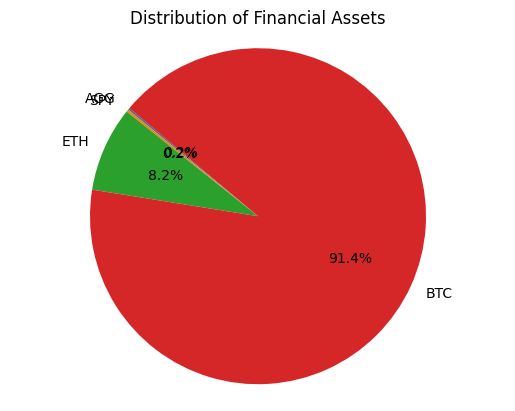

In [104]:
import matplotlib.pyplot as plt 

# Assuming df is your DataFrame
data_plot = df_savings.loc[0]  # Selecting the first row of the DataFrame

# Plotting a pie chart
plt.pie(data_plot, labels=data_plot.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Financial Assets')
plt.axis('equal')
plt.show()

In [78]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().sum()

# Validate saving health
if total_savings >= emergency_fund:
    print("Your savings are in good health.")
    print(total_savings)
else:
    print("Consider saving more to meet the recommended emergency fund.")

Your savings are in good health.
8684429.9


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [79]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [80]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df

# Display sample data 
df_ticker.head()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.605,110.7400,110.5200,15122,110.74,3608552,110.626939,AGG
2016-05-03 04:00:00+00:00,110.810,110.9450,110.7500,15663,110.89,3128774,110.864495,AGG
2016-05-04 04:00:00+00:00,110.860,110.9315,110.7595,13984,110.91,3096337,110.877983,AGG
2016-05-05 04:00:00+00:00,111.140,111.1600,110.8010,15708,110.92,3052967,111.030002,AGG
2016-05-06 04:00:00+00:00,110.970,111.1200,110.9700,12697,111.12,2922700,111.027631,AGG


In [81]:
# Reorganize the DataFrame
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_ticker.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [82]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Ensure the index is in datetime format
df_closing_prices.index = pd.to_datetime(df_closing_prices.index)

# Rename columns to "close"
#df_closing_prices.columns = ["close_" + col for col in df_closing_prices.columns]

df_closing_prices 

,AGG,SPY
2016-05-02,110.605,207.9700
2016-05-03,110.810,206.1592
2016-05-04,110.860,205.0100
2016-05-05,111.140,204.9700
2016-05-06,110.970,205.7200
...,...,...
2021-04-26,114.650,417.6100
2021-04-27,114.370,417.5200
2021-04-28,114.430,417.4000
2021-04-29,114.370,420.0600


In [83]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
# Just to make sure you have the MCForecastTools.py file in the right place 
#?MCSimulation

In [84]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [85]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [86]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 110.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 120.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 130.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 140.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 150.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 160.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 170.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 180.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 190.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 200.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 210.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 220.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 230.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 240.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 250.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 260.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 270.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 280.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 290.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 300.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 310.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 320.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 330.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 340.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 350.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 360.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 370.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 380.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 390.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 400.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 410.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 420.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 430.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 440.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 450.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 460.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 470.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 480.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 490.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004309,1.000129,1.003844,0.991626,1.005222,0.995887,1.001680,1.004976,0.994841,1.003416,...,0.999495,1.002112,1.002481,0.992115,1.001342,1.005898,0.993062,0.985463,1.008648,0.996835
2,0.997125,0.995870,1.009659,0.985511,1.010054,0.995165,1.006638,1.003966,0.993943,1.008055,...,1.009674,1.000768,1.003679,0.984628,1.011054,1.000130,0.995889,0.986419,1.016337,0.996870
3,1.003959,0.996896,1.004313,0.988566,1.010479,0.999191,1.012869,0.999484,0.989926,1.013056,...,1.006487,0.991860,1.005826,0.988748,1.008981,1.004466,0.989796,0.987097,1.024438,0.997041
4,1.007820,1.002861,1.004822,0.986379,1.018667,0.997374,1.010655,1.005035,1.004505,1.012185,...,1.010993,0.985857,1.010561,0.985228,1.013090,0.999176,0.993489,0.979017,1.021956,0.994796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.405480,5.408859,9.617280,5.387502,7.944988,15.826597,7.137937,2.927661,5.389199,5.840781,...,8.091855,8.666210,4.318799,5.916952,5.248323,6.506570,5.184105,7.808720,7.873391,13.260419
7557,3.395793,5.454339,9.602508,5.368333,7.933490,15.788111,7.181542,2.947577,5.346140,5.858855,...,8.118712,8.639767,4.287835,5.959402,5.269106,6.440310,5.157093,7.861569,7.930794,13.387832
7558,3.416498,5.430622,9.558512,5.375120,7.942668,15.857409,7.156397,2.941043,5.371751,5.844251,...,8.115661,8.641322,4.299011,5.992086,5.291930,6.438849,5.130139,7.922513,7.915194,13.434713
7559,3.404793,5.381614,9.498754,5.399779,7.959738,15.846778,7.196268,2.941789,5.395100,5.847769,...,8.104593,8.635760,4.296318,6.025534,5.307770,6.379353,5.178349,7.964180,8.003759,13.315328


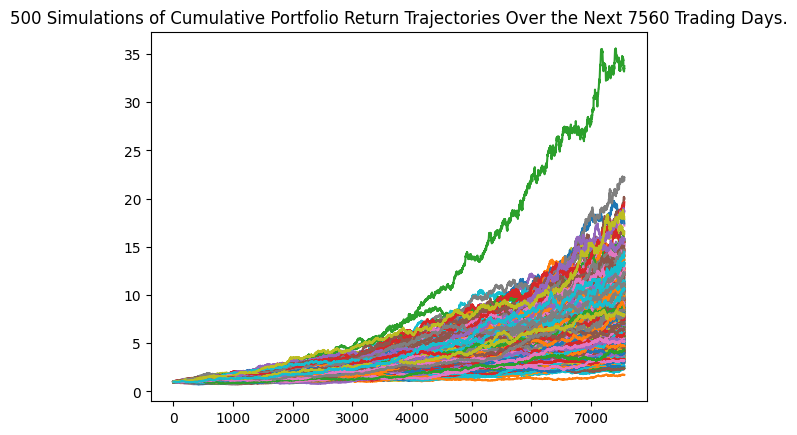

In [87]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

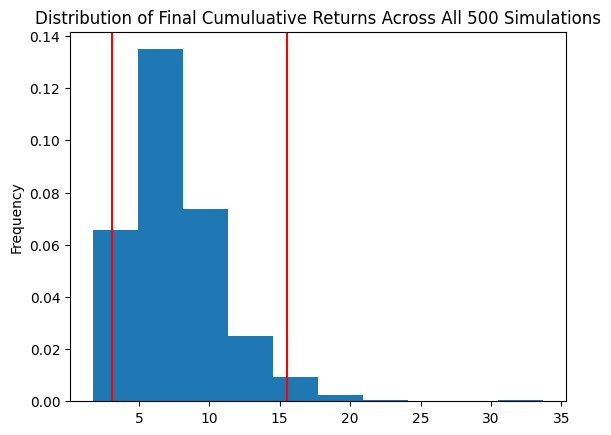

In [88]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [89]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.580426
std               3.463629
min               1.706406
25%               5.233152
50%               6.767847
75%               9.182177
max              33.731425
95% CI Lower      3.114330
95% CI Upper     15.519319
Name: 7560, dtype: float64


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [90]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $31143.3 and $155193.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [91]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*10000,3)
ci_upper = round(tbl[9]*10000,3)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $31143.298 and $155193.187


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [92]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [93]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 120.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 130.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 140.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 150.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 180.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 190.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 200.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 230.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 240.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 250.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 260.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 270.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 300.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 310.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 360.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 410.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001002,0.997197,1.008454,1.003411,0.999116,0.998536,1.000801,1.002667,1.000338,1.000427,...,0.995432,1.000287,0.987862,0.999259,0.992967,0.995055,1.000695,0.998788,1.003543,1.001016
2,0.993099,1.000758,1.019479,1.008715,1.002561,0.993904,1.001303,1.012622,1.002879,1.007472,...,1.000055,1.002442,0.992172,1.001567,0.999573,0.991156,0.997623,0.997679,1.007593,0.999055
3,0.980899,0.999380,1.027200,1.007347,0.995718,0.996727,0.999125,1.009408,1.003290,1.011723,...,1.006480,1.009603,0.988769,1.007153,1.000092,1.001871,0.997767,1.002986,1.012895,0.995991
4,0.977981,0.993245,1.033314,1.016172,0.999492,1.002996,0.990776,1.011384,1.004529,1.010637,...,1.004513,1.009050,0.988274,1.007265,1.010714,1.001204,1.002381,0.995905,1.011070,1.000791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.166431,1.483670,1.910509,1.837013,0.988387,1.353049,1.473221,1.469489,1.523496,1.561623,...,1.195943,1.180474,1.462637,1.338629,1.524074,1.393673,1.382566,1.257331,1.372883,1.727170
1257,1.163346,1.493569,1.914318,1.843439,0.991061,1.353752,1.460400,1.474529,1.529965,1.563317,...,1.194068,1.177265,1.475086,1.350738,1.524870,1.394037,1.383130,1.255986,1.364208,1.725237
1258,1.169569,1.499482,1.909259,1.832876,0.989685,1.350818,1.470794,1.469843,1.519492,1.566260,...,1.196830,1.192138,1.481088,1.348852,1.535357,1.388488,1.386009,1.266624,1.352649,1.715449
1259,1.174842,1.489199,1.911455,1.828306,0.994566,1.347945,1.459003,1.461144,1.517316,1.562054,...,1.196091,1.198971,1.479595,1.341063,1.528970,1.384857,1.385553,1.273936,1.344383,1.721419


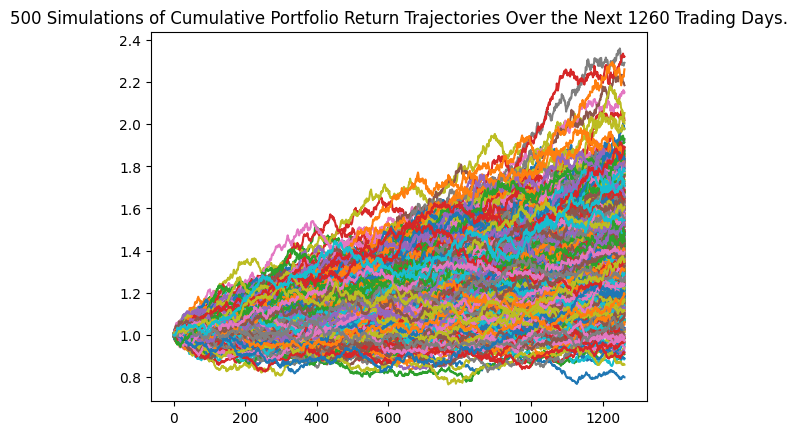

In [94]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

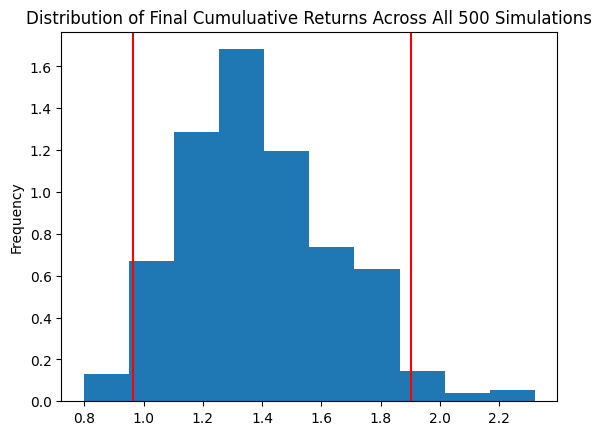

In [95]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.393908
std               0.259989
min               0.798856
25%               1.207307
50%               1.357875
75%               1.553841
max               2.320622
95% CI Lower      0.964333
95% CI Upper      1.903739
Name: 1260, dtype: float64


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [97]:
# Set initial investment
initial_investment = 40000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[8]*10000,3)
ci_upper = round(tbl[9]*10000,3)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 30 years will end within in the range of $9643.33 and $19037.389


### Ten Years Retirement Option

In [98]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [99]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 110.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 120.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 130.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 140.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 150.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 160.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 170.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 180.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 190.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 200.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 210.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 220.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 230.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 240.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 250.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 260.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 270.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 280.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 290.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 300.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 310.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 320.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 330.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 340.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 350.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 360.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 370.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 380.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 390.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 400.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 410.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 420.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 430.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 440.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 450.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 460.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 470.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 480.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

Running Monte Carlo simulation number 490.


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Finan

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999393,1.003110,0.998524,1.011443,1.002289,0.995231,1.003756,0.999452,0.992453,0.999790,...,0.998479,0.996223,1.000063,1.002403,1.002698,0.999211,1.007259,0.996933,1.000373,0.991622
2,0.996439,1.004760,1.002815,1.012026,1.004155,0.991558,1.005940,0.992971,0.999920,1.006053,...,0.996713,0.994434,1.005550,1.001526,0.998774,1.003499,1.012336,0.985060,1.007951,0.997842
3,1.001315,1.002287,0.998345,1.013112,1.008246,0.996300,1.012718,0.995701,1.003106,1.004794,...,0.995860,0.989515,1.004229,1.000610,1.001886,1.007840,1.014401,0.994452,1.007849,0.991827
4,1.008733,0.996425,0.998960,1.020772,1.010340,1.003277,1.018286,0.996077,1.004114,1.003986,...,1.005938,0.986356,1.006999,1.006696,0.997059,1.004306,1.016181,0.996714,1.012536,0.993522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.355392,1.522740,1.727992,1.154677,1.104142,1.353131,1.880524,2.720063,2.069997,1.847873,...,1.650965,1.700051,1.590381,2.366950,1.615788,2.026056,2.121199,1.974616,2.035692,2.559889
2517,2.338369,1.512241,1.732332,1.150119,1.106169,1.358485,1.869535,2.721995,2.060103,1.849551,...,1.659374,1.708414,1.598863,2.371159,1.631024,2.041870,2.130514,1.975707,2.050123,2.557228
2518,2.320093,1.513053,1.723648,1.154849,1.101702,1.362640,1.883484,2.737613,2.065928,1.848063,...,1.653922,1.702384,1.602975,2.369293,1.628617,2.051897,2.134783,1.978464,2.048138,2.549136
2519,2.327896,1.514800,1.734165,1.153361,1.103712,1.357064,1.890814,2.739014,2.070220,1.846511,...,1.655465,1.705768,1.595728,2.370287,1.616869,2.061515,2.135107,1.993012,2.034709,2.540273


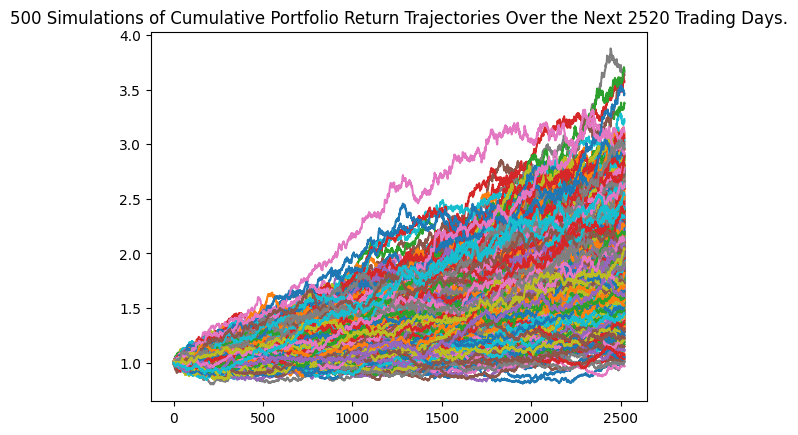

In [100]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

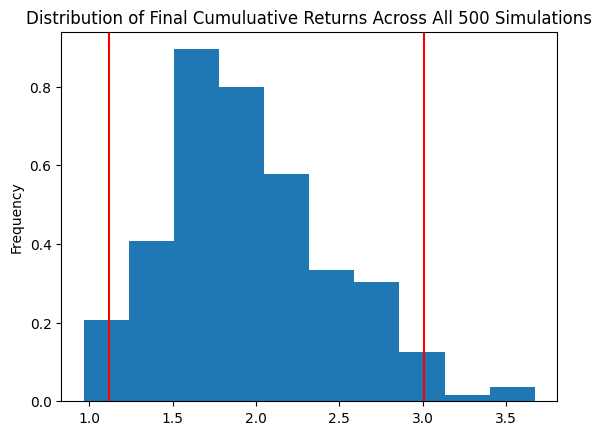

In [101]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.955750
std               0.500915
min               0.967645
25%               1.602083
50%               1.889176
75%               2.255386
max               3.672268
95% CI Lower      1.116473
95% CI Upper      3.008807
Name: 2520, dtype: float64


/Users/kaylahoffman/Desktop/Financial_Planning/Module_5_Instructions/Financial_Planning_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [103]:
# Set initial investment
initial_investment = 40000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[8]*10000,3)
ci_upper = round(tbl[9]*10000,3)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 10 years will end within in the range of $11164.725 and $30088.067
